In [1]:
from sympy import symbols, init_printing
init_printing()
from celmech.hamiltonian import AndoyerHamiltonian, EquibAndoyerHamiltonian
from celmech.transformations import poincare_vars_to_andoyer_vars, poincare_vars_from_sim
from celmech.transformations import jacobi_masses_from_sim, get_andoyer_params
from celmech.transformations import andoyer_vars_to_poincare_vars, andoyer_vars_from_sim
from celmech.transformations import poincare_vars_to_sim, andoyer_vars_to_sim
from celmech.transformations import andoyer_vars_to_poincare_vars, equib_andoyer_vars_from_sim
from celmech.transformations import setup_res
import numpy as np

In [2]:
G = 4*np.pi**2
masses = [1., 1.e-5, 1.e-6]
Phi_equil = 10
j = 7
k = 2

sim = setup_res(G, masses, j, k, Phi_equil)

In [3]:
a10 = 1.
andvars = equib_andoyer_vars_from_sim(sim, j, k, a10)

In [4]:
andvars.state

OrderedDict([('Phix', -10.000000000007576),
 ('Phiy', -3.7849708728192892e-06),
 ('Wx', -5.7370673824055837e-23),
 ('Wy', 1.0735409052377868e-27),
 ('Brouwer', -9.7500000000053664),
 ('K', -1.5683242728336017e-11),
 ('deltalambda', 3.1415927076608057),
 ('lambda1', 0.0)])

In [5]:
for p in sim.particles[1:]:
    print(p.orbit)

<rebound.Orbit instance, a=0.9999931233992311 e=0.0028181501148275175 inc=0.0 Omega=0.0 omega=0.0 f=0.0>
<rebound.Orbit instance, a=1.2515726505188007 e=0.030204033779418986 inc=0.0 Omega=0.0 omega=3.141592653589793 f=0.0>


In [7]:
from celmech.transformations import andoyer_phiprime
ps = sim.particles

andvars = equib_andoyer_vars_from_sim(sim, j, k, a10)#, average_synodic_terms=True)
B0 = andvars.Brouwer
W0 = andvars.W
phiprime = andoyer_phiprime(andvars, G, masses, j, k, a10)
Hsim = EquibAndoyerHamiltonian(k, phiprime, andvars.Phi, andvars.phi)

Norbits = 3000
Nout = 1000
tmax = Norbits*sim.particles[1].P
times = np.linspace(0, tmax, Nout)
symtimes = times/abs(timescale)

Nsol = np.zeros((2, Nout))
symsol = np.zeros((2, Nout))
pratio, BrouwerErr, WErr, Ks = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
Ws, ws = np.zeros(Nout), np.zeros(Nout)

for i, time in enumerate(times):
    pratio[i] = ps[2].P/ps[1].P
    andvars = equib_andoyer_vars_from_sim(sim, j, k, a10)#, average_synodic_terms=True)
    Phi, phi, W, w, B, K, deltalambda, lambda1 = andvars
    BrouwerErr[i] = abs((andvars.Brouwer-B0)/B0)
    WErr[i] = abs((andvars.W-W0)/W0)
    Ks[i] = andvars.K
    Ws[i] = andvars.W
    ws[i] = andvars.w

    symsol[:,i] = [Hsim.y['Phi'], Hsim.y['phi']]
    Nsol[:,i] = [Phi, phi]

    sim.integrate(np.sign(timescale)*time)    
    Hsim.integrate(symtimes[i])

NameError: name 'timescale' is not defined

In [7]:
Hsim.NH

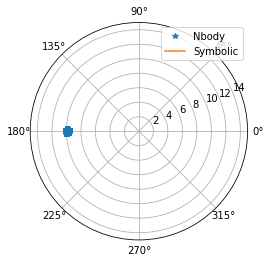

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.subplot('111', projection='polar')
ax.plot(Nsol[1,:], Nsol[0,:], '*', label='Nbody')
ax.plot(symsol[1,:], symsol[0,:], label='Symbolic')
ax.set_rlim(0,15)
ax.legend()

In [9]:
def wrap(val):
    while val < -np.pi:
        val += 2*np.pi
    while val > np.pi:
        val -= 2*np.pi
    return val

npwrap = np.vectorize(wrap)

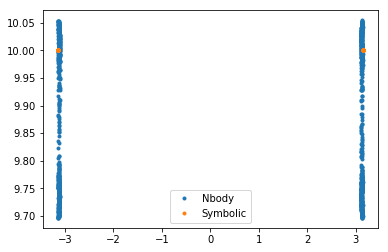

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(npwrap(Nsol[1,:]), Nsol[0,:], '.', label='Nbody')
ax.plot(npwrap(symsol[1,:]), symsol[0,:], '.', label='Symbolic')
ax.legend()

# Previous test

In [23]:
from celmech.transformations import get_second_order_equilibrium, get_second_order_phiprime

In [24]:
Phiprime = get_second_order_phiprime(np.sqrt(20))
Phiprime

In [25]:
def wrap(val):
    while val < -np.pi:
        val += 2*np.pi
    while val > np.pi:
        val -= 2*np.pi
    return val

npwrap = np.vectorize(wrap)

In [26]:
Hsim = EquibAndoyerHamiltonian(k, Phiprime, 10, np.pi)
tmax=10
Nout = 1000
times = np.linspace(0, tmax, Nout)

symsol = np.zeros((2, Nout))
pratio, BrouwerErr, WErr, Ks = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)

for i, time in enumerate(times):
    symsol[:,i] = [Hsim.y['Phi'], Hsim.y['phi']]
    Hsim.integrate(times[i])

In [27]:
Hsim.NH

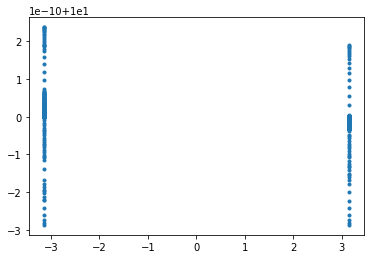

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(npwrap(symsol[1,:]), symsol[0,:], '.')